In [397]:
import lumicks.pylake as lk
import matplotlib.pyplot as plt
import numpy as np
from numba import jit


In [398]:
# filename = "Catherine-Emmy-Sam/20230227-160319 Marker Bead2.14-10-1.h5"
# filename = "Catherine-Emmy-Sam/20230227-160453 Marker Bead2.14-20-1.h5"
# filename = "Catherine-Emmy-Sam/20230227-160702 Marker Bead2.14-15-1.h5"
# filename = "Catherine-Emmy-Sam/20230227-161230 Marker Bead2.14-15-2.h5"
# filename = "Catherine-Emmy-Sam/20230227-161411 Marker Bead2.14-10-2.h5"
# filename = "Catherine-Emmy-Sam/20230227-161528 Marker Bead2.14-20-2.h5"
# filename = "Catherine-Emmy-Sam/20230227-161826 Marker Bead4.5-30-1.h5"
# filename = "Catherine-Emmy-Sam/20230227-162001 Marker Bead4.5-20-1.h5"
# filename = "Catherine-Emmy-Sam/20230227-162131 Marker Bead4.5-10-1.h5"
# filename = "Catherine-Emmy-Sam/20230227-162434 Marker Bead4.5-30-2.h5"
# filename = "Catherine-Emmy-Sam/20230227-162542 Marker Bead4.5-20-2.h5"
filename = "Catherine-Emmy-Sam/20230227-162646 Marker Bead4.5-10-2.h5"
data = lk.File(filename)
# laser_power = "10";
# trial_number = "1";
trial_number = filename[-4:-3]
laser_power = filename[-7:-5]

In [399]:
save_q = True;

In [400]:
print(trial_number)
print(laser_power)

2
10


In [401]:


r1x = data.force1x.calibration[0]["Response (pN/V)"]
r1y = data.force1y.calibration[0]["Response (pN/V)"]
r2x = data.force2x.calibration[0]["Response (pN/V)"]
r2y = data.force2y.calibration[0]["Response (pN/V)"]

V1x = data.force1x.data / r1x
V1y = data.force1y.data / r1y
V2x = data.force2x.data / r2x
V2y = data.force2y.data / r2y
  
t = data.force1x.seconds
fs = data.force1x.sample_rate

In [402]:
power_spectrum_V1x = lk.calculate_power_spectrum(V1x,sample_rate=fs);
power_spectrum_V1y = lk.calculate_power_spectrum(V1y,sample_rate=fs);
power_spectrum_V2x = lk.calculate_power_spectrum(V2x,sample_rate=fs);
power_spectrum_V2y = lk.calculate_power_spectrum(V2y,sample_rate=fs);

In [403]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "CMU Serif"
})


In [404]:
# bead_diameter = data.force2y.calibration[0]["Bead diameter (um)"]
bead_diameter = data.force1x.calibration[0]["Bead diameter (um)"]
# force_model = lk.PassiveCalibrationModel(bead_diameter, viscosity=0.001002, temperature=25,hydrodynamically_correct=True,fast_sensor=True)
# force_model = lk.PassiveCalibrationModel(bead_diameter, viscosity=0.001002, temperature=25)
temp=25;
force_model_V1x = lk.PassiveCalibrationModel(bead_diameter, viscosity=0.00089, temperature=temp)
force_model_V1y = lk.PassiveCalibrationModel(bead_diameter, viscosity=0.00089, temperature=temp)
force_model_V2x = lk.PassiveCalibrationModel(bead_diameter, viscosity=0.00089, temperature=temp)
force_model_V2y = lk.PassiveCalibrationModel(bead_diameter, viscosity=0.00089, temperature=temp)


In [405]:
fit_ps_V1x = lk.fit_power_spectrum(power_spectrum_V1x, force_model_V1x)
fit_ps_V1y = lk.fit_power_spectrum(power_spectrum_V1y, force_model_V1y)
fit_ps_V2x = lk.fit_power_spectrum(power_spectrum_V2x, force_model_V2x)
fit_ps_V2y = lk.fit_power_spectrum(power_spectrum_V2y, force_model_V2y)

In [406]:
fit_ps_V1x

Name,Description,Value
Bead diameter,Bead diameter (um),4.5
Viscosity,Liquid viscosity (Pa*s),0.00089
Temperature,Liquid temperature (C),25
Distance to surface,Distance from bead center to surface (um),
Max iterations,Maximum number of function evaluations,10000
Fit tolerance,Fitting tolerance,1e-07
Points per block,Number of points per block,2000
Sample rate,Sample rate (Hz),78125
Bias correction,Perform bias correction thermal fit,1
Rd,Distance response (um/V),3.58184


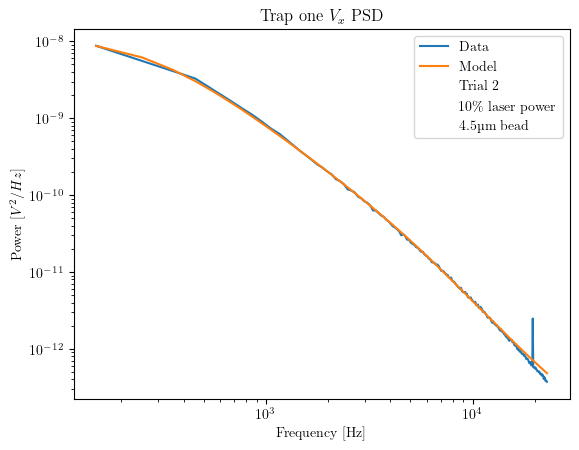

In [407]:
fit_ps_V1x.plot()
plt.title("Trap one $V_x$ PSD");
plt.plot([], [], ' ', label="Trial "+trial_number)
plt.plot([], [], ' ', label=laser_power + "\% laser power")
plt.plot([], [], ' ', label=str(bead_diameter)+"µm bead")
plt.legend()
if save_q:
    plt.savefig('figs/PSD-fit___bead_diam='+str(fit_ps_V1x.params["Bead diameter"].value)+'-laser_power='+laser_power+'-trial='+trial_number+'-direction='+'x'+'-trap='+'1'+'.png',dpi=300)

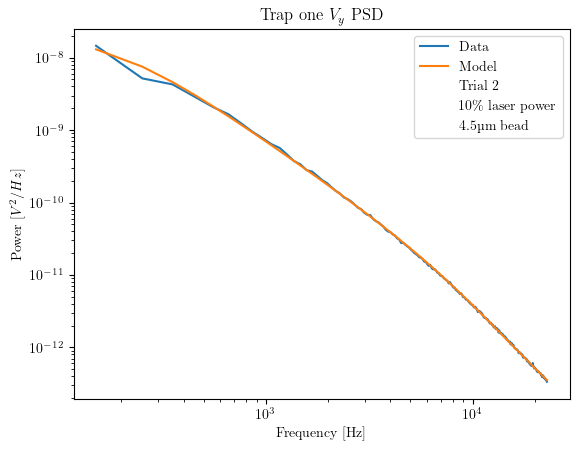

In [408]:
fit_ps_V1y.plot()
plt.title("Trap one $V_y$ PSD");
plt.plot([], [], ' ', label="Trial "+trial_number)
plt.plot([], [], ' ', label=laser_power + "\% laser power")
plt.plot([], [], ' ', label=str(bead_diameter)+"µm bead")
plt.legend()
if save_q:
    plt.savefig('figs/PSD-fit___bead_diam='+str(fit_ps_V1x.params["Bead diameter"].value)+'-laser_power='+laser_power+'-trial='+trial_number+'-direction='+'y'+'-trap='+'1'+'.png',dpi=300)


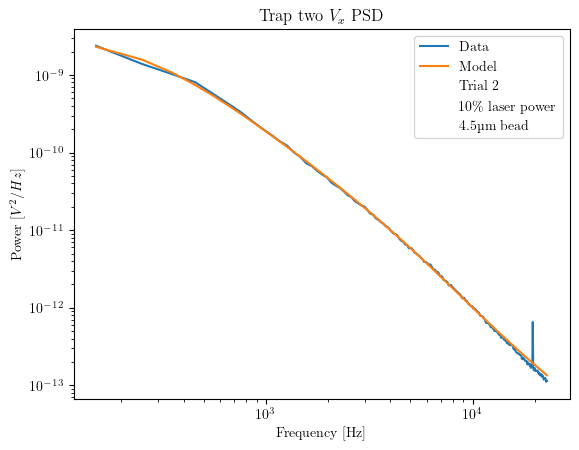

In [409]:
fit_ps_V2x.plot()
plt.title("Trap two $V_x$ PSD");
plt.plot([], [], ' ', label="Trial "+trial_number)
plt.plot([], [], ' ', label=laser_power + "\% laser power")
plt.plot([], [], ' ', label=str(bead_diameter)+"µm bead")
plt.legend()
if save_q:
    plt.savefig('figs/PSD-fit___bead_diam='+str(fit_ps_V1x.params["Bead diameter"].value)+'-laser_power='+laser_power+'-trial='+trial_number+'-direction='+'x'+'-trap='+'2'+'.png',dpi=300)


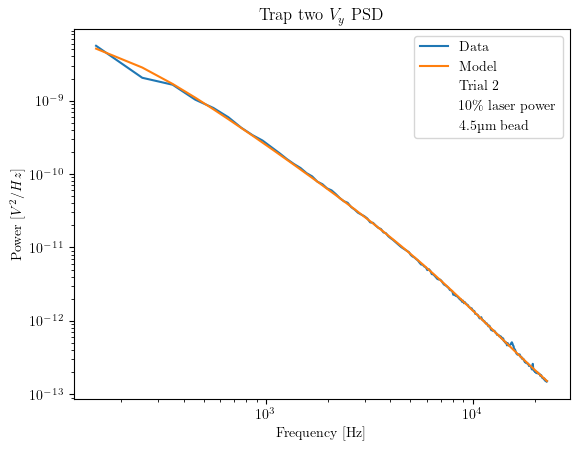

In [410]:
fit_ps_V2y.plot()
plt.title("Trap two $V_y$ PSD");
plt.plot([], [], ' ', label="Trial "+trial_number)
plt.plot([], [], ' ', label=laser_power + "\% laser power")
plt.plot([], [], ' ', label=str(bead_diameter)+"µm bead")
plt.legend()
if save_q:
    plt.savefig('figs/PSD-fit___bead_diam='+str(fit_ps_V1x.params["Bead diameter"].value)+'-laser_power='+laser_power+'-trial='+trial_number+'-direction='+'y'+'-trap='+'2'+'.png',dpi=300)


$$
\kappa = 2 \pi \gamma f_c,
\qquad
\gamma_0 = 6\pi\eta r
\qquad
\beta = \sqrt{
    \frac{D_\text{phys}}{D_\text{meas}}
}
\qquad
D_\text{phys} = \frac{k_B T}{\gamma_0}
$$

$$
\delta \kappa = 2\pi\gamma_c \delta f_c,
\qquad
\delta \beta =
\left|
\frac{\partial \beta}{\partial D_\text{meas}}
\right|
\delta D_\text{meas}
=
\frac{1}{2}\sqrt{\frac{D_\text{phys}}{D_\text{meas}^3}} \delta D_\text{meas}
$$

https://lumicks-pylake.readthedocs.io/en/stable/tutorial/force_calibration.html

In [411]:
pos_V1x= fit_ps_V1x.results["Rd"].value * 1e-6 * V1x
pos_V1y= fit_ps_V1y.results["Rd"].value * 1e-6 * V1y
pos_V2x= fit_ps_V2x.results["Rd"].value * 1e-6 * V2x
pos_V2y= fit_ps_V2y.results["Rd"].value * 1e-6 * V2y

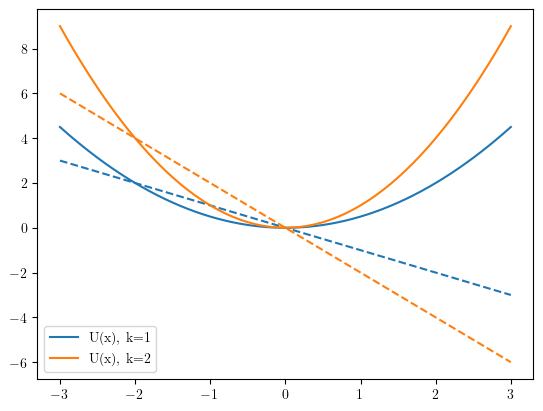

In [412]:
#this function returns the energy and force on a particle from a harmonic potential
@jit
def harmonic_oscillator_energy_force(x,k=1,x0=0):
    #calculate the energy on force on the right hand side of the equal signs
    energy = 0.5*k*(x-x0)**2
    force = -k*(x-x0)
    # energy = 0.5*k*(x-x0)**2 - 1e9*0.25*k*(x-x0)**4
    # force = -k*(x-x0) + 1e4*k*(x-x0)**3
    return energy, force

#this function will plot the energy and force
#it is very general since it uses a special python trick of taking arbitrary named arguments (**kwargs) 
#and passes them on to a specified input function
def plot_energy_force(function, xmin=-3,xmax=3,spacing=0.1,**kwargs):
    x_points = np.arange(xmin,xmax+spacing,spacing)
    energies, forces = function(x_points,**kwargs)
    label = 'U(x)'
    for arg in kwargs:
        label=label+', %s=%s'%(arg,str(kwargs[arg]))
    p = plt.plot(x_points,energies,label=label)
    plt.plot(x_points,forces,label='',color=p[0].get_color(),linestyle='--')
    plt.legend(loc=0)
    
#we can plot the energy (solid) and forces (dashed) to see if it looks right
plot_energy_force(harmonic_oscillator_energy_force,k=1)
plot_energy_force(harmonic_oscillator_energy_force,k=2)

# Step A, update position from velocity
@jit
def position_update(x,v,dt):
    x_new = x + v*dt/2.
    return x_new

# Step B, update velocity with force from potential
@jit
def velocity_update(v,a,dt):
    v_new = v + a*dt/2.
    return v_new

# Step O, update velocity with damping and thermal motion
@jit
def random_velocity_update(v,gamma,kBT_m,dt):
    R = np.random.normal()
    c1 = np.exp(-gamma*dt)
    c2 = np.sqrt(1-c1*c1)*np.sqrt(kBT_m)
    v_new = c1*v + R*c2
    return v_new

@jit
def baoab(potential, max_time, dt, zeta, kBT, mass, initial_position, initial_velocity,
                                        save_frequency=3, k=1, x0=0):
    x = initial_position
    v = initial_velocity
    t = 0
    step_number = 0
    save_number = 0

    times = np.linspace(0, max_time, int(max_time/dt))
    
    n_saved = int(np.ceil(times.size/save_frequency))
    save_times = np.linspace(0, max_time, n_saved)
    
    positions = np.zeros(n_saved)
    velocities = np.zeros(n_saved)
    total_energies = np.zeros(n_saved)
                             
    for t in times:
        # B
        potential_energy, force = potential(x,k,x0)
        v = velocity_update(v,force/mass,dt)
        #A
        x = position_update(x,v,dt)
        #O
        v = random_velocity_update(v,zeta,kBT/mass,dt)
        #A
        x = position_update(x,v,dt)
        # B
        potential_energy, force = potential(x,k,x0)
        v = velocity_update(v,force/mass,dt)
        
        if step_number%save_frequency == 0:
            e_total = .5*mass*v**2 + potential_energy

            positions[save_number] = x
            velocities[save_number] = v
            total_energies[save_number] = e_total
            
            save_number = save_number + 1
        
        step_number = step_number + 1
    
    return save_times, positions, velocities, total_energies   

In [413]:
# Simulations parameters
max_time = 10 # Simulation time, in s
dt = 1e-6 # Timestep, in s
save_frequency = int(np.round((1/fs)/dt)) # Save every nth step
initial_position = 0 # Starting distance of bead from trap center, in m
initial_velocity = 0 # Starting velocity of bead, in m/s

# Bead parameters
viscosity = 0.00089 # Viscosity of water at 25C, in Pa*s
radius = 1e-6*fit_ps_V1x.params["Bead diameter"].value/2 # Radius of bead, in m
density = 1047 # Density of polystyrene beads, in kg/m^3
mass = 4/3*np.pi*radius**3*density # Mass of bead, in kg
gamma = 6*np.pi*viscosity*radius # Damping constant from Stoke's law, in kg/s
zeta = gamma/mass # Damping constant, in 1/s

# Other parameters
k_V1x = 1e-3*fit_ps_V1x.results["kappa"].value # Trap stiffness in N/m (1 pN/nm = 1e-3 N/m)
k_V1y = 1e-3*fit_ps_V1y.results["kappa"].value # Trap stiffness in N/m (1 pN/nm = 1e-3 N/m)
k_V2x = 1e-3*fit_ps_V2x.results["kappa"].value # Trap stiffness in N/m (1 pN/nm = 1e-3 N/m)
k_V2y = 1e-3*fit_ps_V2y.results["kappa"].value # Trap stiffness in N/m (1 pN/nm = 1e-3 N/m)
kBT = 4.18544e-21 # Thermal energy at 25C, in J

In [414]:
mass

4.995544653243554e-14

In [415]:
times, langevin_positions_V1x, _, _ = baoab(
    harmonic_oscillator_energy_force,
    max_time, dt, zeta, kBT, mass,
    initial_position, initial_velocity,
    save_frequency, k=k_V1x
)

times, langevin_positions_V1y, _, _ = baoab(
    harmonic_oscillator_energy_force,
    max_time, dt, zeta, kBT, mass,
    initial_position, initial_velocity,
    save_frequency, k=k_V1y
)

times, langevin_positions_V2x, _, _ = baoab(
    harmonic_oscillator_energy_force,
    max_time, dt, zeta, kBT, mass,
    initial_position, initial_velocity,
    save_frequency, k=k_V2x
)

times, langevin_positions_V2y, _, _ = baoab(
    harmonic_oscillator_energy_force,
    max_time, dt, zeta, kBT, mass,
    initial_position, initial_velocity,
    save_frequency, k=k_V2y
)



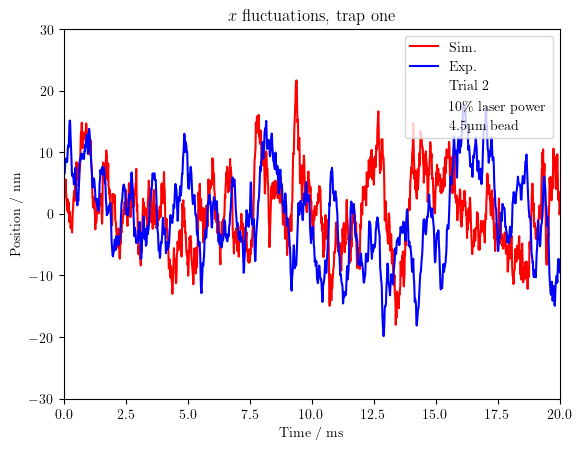

In [416]:
plt.figure()
# plt.plot(times[0:1000],positions[0:1000],marker='',label='position',linestyle='-', color="r")
plt.plot(times/1e-3,langevin_positions_V1x/1e-9,marker='',label='Sim.',linestyle='-', color="r")
plt.plot(t[1:2000]/1e-3,(pos_V1x[1:2000] - np.mean(pos_V1x))/1e-9,marker='',label='Exp.',linestyle='-', color="b")
plt.xlabel('Time / ms')
plt.ylabel('Position / nm')
plt.title("$x$ fluctuations, trap one")
plt.plot([], [], ' ', label="Trial "+trial_number)
plt.plot([], [], ' ', label=laser_power + "\% laser power")
plt.plot([], [], ' ', label=str(bead_diameter)+"µm bead")
plt.legend(loc="upper right")
plt.xlim(0,20)
plt.ylim(-30,30)
if save_q:
    plt.savefig('figs/time-series___bead_diam='+str(fit_ps_V1x.params["Bead diameter"].value)+'-laser_power='+laser_power+'-trial='+trial_number+'-direction='+'x'+'-trap='+'1'+'.png',dpi=300)
plt.show()


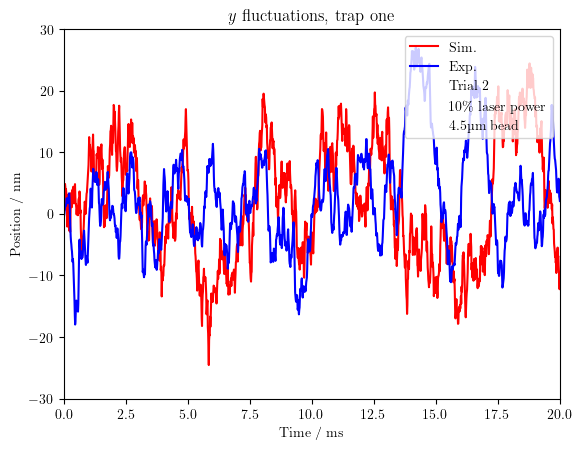

In [417]:
plt.figure()
# plt.plot(times[0:1000],positions[0:1000],marker='',label='position',linestyle='-', color="r")
plt.plot(times/1e-3,langevin_positions_V1y/1e-9,marker='',label='Sim.',linestyle='-', color="r")
plt.plot(t[1:2000]/1e-3,(pos_V1y[1:2000] - np.mean(pos_V1y))/1e-9,marker='',label='Exp.',linestyle='-', color="b")
plt.xlabel('Time / ms')
plt.ylabel('Position / nm')
plt.title("$y$ fluctuations, trap one")
plt.plot([], [], ' ', label="Trial "+trial_number)
plt.plot([], [], ' ', label=laser_power + "\% laser power")
plt.plot([], [], ' ', label=str(bead_diameter)+"µm bead")
plt.legend(loc="upper right")
# plt.ylim(-1.25e-8,1.25e-8)
plt.xlim(0,20)
plt.ylim(-30,30)
if save_q:
    plt.savefig('figs/time-series___bead_diam='+str(fit_ps_V1x.params["Bead diameter"].value)+'-laser_power='+laser_power+'-trial='+trial_number+'-direction='+'y'+'-trap='+'1'+'.png',dpi=300)
plt.show()


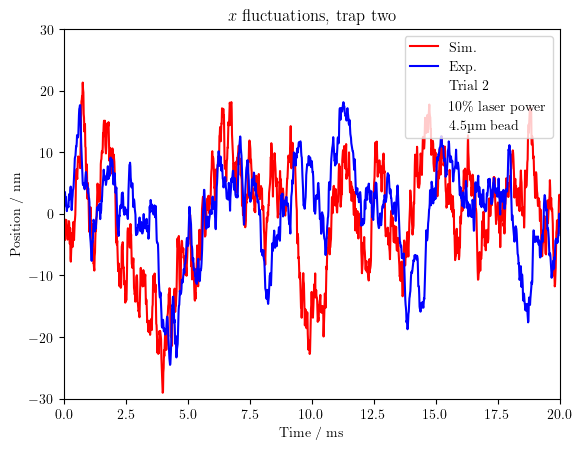

In [418]:
plt.figure()
# plt.plot(times[0:1000],positions[0:1000],marker='',label='position',linestyle='-', color="r")
plt.plot(times/1e-3,langevin_positions_V2x/1e-9,marker='',label='Sim.',linestyle='-', color="r")
plt.plot(t[1:2000]/1e-3,(pos_V2x[1:2000] - np.mean(pos_V2x))/1e-9,marker='',label='Exp.',linestyle='-', color="b")
plt.xlabel('Time / ms')
plt.ylabel('Position / nm')
plt.title("$x$ fluctuations, trap two")
plt.plot([], [], ' ', label="Trial "+trial_number)
plt.plot([], [], ' ', label=laser_power + "\% laser power")
plt.plot([], [], ' ', label=str(bead_diameter)+"µm bead")
plt.legend(loc="upper right")
# plt.ylim(-1.25e-8,1.25e-8)
plt.xlim(0,20)
plt.ylim(-30,30)
if save_q:
    plt.savefig('figs/time-series___bead_diam='+str(fit_ps_V1x.params["Bead diameter"].value)+'-laser_power='+laser_power+'-trial='+trial_number+'-direction='+'x'+'-trap='+'2'+'.png',dpi=300)
plt.show()


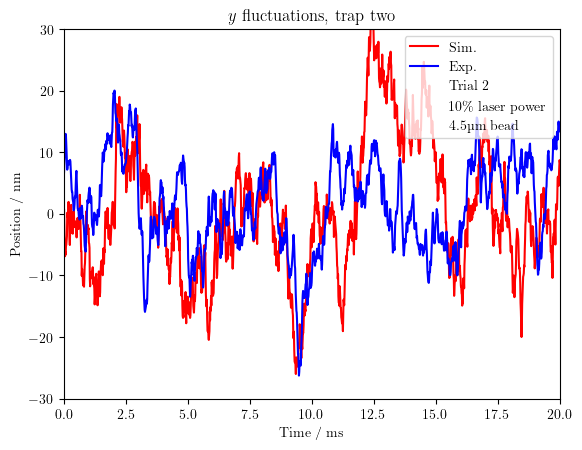

In [419]:
plt.figure()
# plt.plot(times[0:1000],positions[0:1000],marker='',label='position',linestyle='-', color="r")
plt.plot(times/1e-3,langevin_positions_V2y/1e-9,marker='',label='Sim.',linestyle='-', color="r")
plt.plot(t[1:2000]/1e-3,(pos_V2y[1:2000] - np.mean(pos_V2y))/1e-9,marker='',label='Exp.',linestyle='-', color="b")
plt.xlabel('Time / ms')
plt.ylabel('Position / nm')
plt.title("$y$ fluctuations, trap two")
plt.plot([], [], ' ', label="Trial "+trial_number)
plt.plot([], [], ' ', label=laser_power + "\% laser power")
plt.plot([], [], ' ', label=str(bead_diameter)+"µm bead")
plt.legend(loc="upper right")
# plt.ylim(-1.25e-8,1.25e-8)
plt.xlim(0,20)
plt.ylim(-30,30)
if save_q:
    plt.savefig('figs/time-series___bead_diam='+str(fit_ps_V1x.params["Bead diameter"].value)+'-laser_power='+laser_power+'-trial='+trial_number+'-direction='+'y'+'-trap='+'2'+'.png',dpi=300)
plt.show()


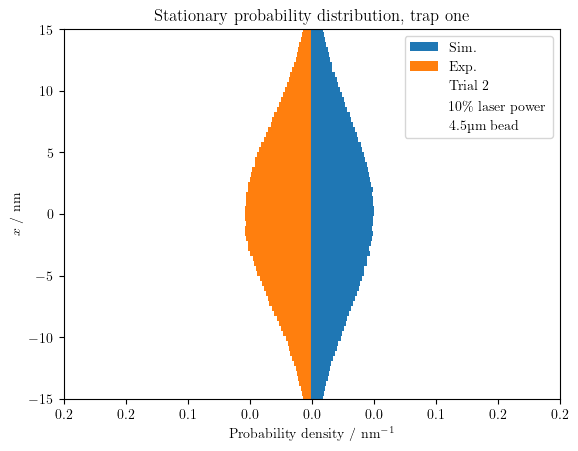

In [420]:
from matplotlib import pylab as pl

dataTwo = langevin_positions_V1x/1e-9;
dataOne = (pos_V1x - np.mean(pos_V1x))/1e-9;

hN = pl.hist(dataTwo,bins=np.linspace(-20.0,20.0,100) ,orientation='horizontal', density=True, rwidth=1, label='Sim.')
hS = pl.hist(dataOne, bins=hN[1], orientation='horizontal', density=True, 
    rwidth=1, label='Exp.')

for p in hS[2]:
    p.set_width( - p.get_width())

xmin = -0.2; xmax = 0.2;
rangee = xmax - xmin
delta = 0.0 * rangee
pl.xlim([xmin - delta, xmax + delta])
pl.ylim(-15,15)
xt = pl.xticks()
n = xt[0]
s = ['%.1f'%abs(i) for i in n]
pl.xticks(n, s)
pl.xlabel("Probability density / $\mathrm{nm}^{-1}$")
pl.ylabel("$x$ / nm")
pl.plot([], [], ' ', label="Trial "+trial_number)
pl.plot([], [], ' ', label=laser_power + "\% laser power")
pl.plot([], [], ' ', label=str(bead_diameter)+"µm bead")
pl.legend(loc="upper right")
pl.axvline(0.0)
pl.title("Stationary probability distribution, trap one")
if save_q:
    pl.savefig('figs/stat-dist___bead_diam='+str(fit_ps_V1x.params["Bead diameter"].value)+'-laser_power='+laser_power+'-trial='+trial_number+'-direction='+'x'+'-trap='+'1'+'.png',dpi=300)
pl.show()


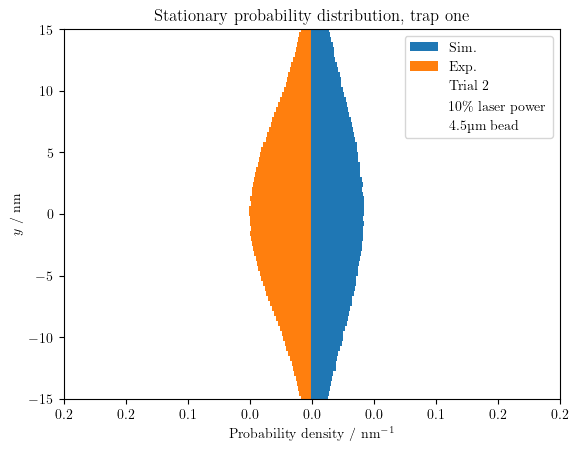

In [421]:
from matplotlib import pylab as pl

dataTwo = langevin_positions_V1y/1e-9;
dataOne = (pos_V1y - np.mean(pos_V1y))/1e-9;

hN = pl.hist(dataTwo,bins=np.linspace(-20.0,20.0,100) ,orientation='horizontal', density=True, rwidth=1, label='Sim.')
hS = pl.hist(dataOne, bins=hN[1], orientation='horizontal', density=True, 
    rwidth=1, label='Exp.')

for p in hS[2]:
    p.set_width( - p.get_width())

xmin = -0.2; xmax = 0.2;
rangee = xmax - xmin
delta = 0.0 * rangee
pl.xlim([xmin - delta, xmax + delta])
pl.ylim(-15,15)
xt = pl.xticks()
n = xt[0]
s = ['%.1f'%abs(i) for i in n]
pl.xticks(n, s)
pl.xlabel("Probability density / $\mathrm{nm}^{-1}$")
pl.ylabel("$y$ / nm")
pl.plot([], [], ' ', label="Trial "+trial_number)
pl.plot([], [], ' ', label=laser_power + "\% laser power")
pl.plot([], [], ' ', label=str(bead_diameter)+"µm bead")
pl.legend(loc="upper right")
pl.axvline(0.0)
plt.title("Stationary probability distribution, trap one")
if save_q:
    pl.savefig('figs/stat-dist___bead_diam='+str(fit_ps_V1x.params["Bead diameter"].value)+'-laser_power='+laser_power+'-trial='+trial_number+'-direction='+'y'+'-trap='+'1'+'.png',dpi=300)
pl.show()

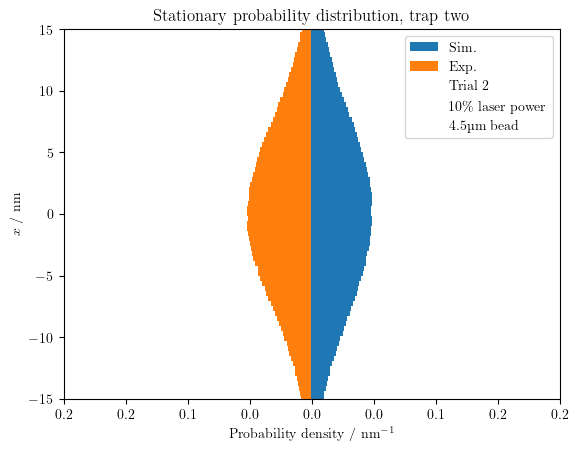

In [422]:
from matplotlib import pylab as pl

dataTwo = langevin_positions_V2x/1e-9;
dataOne = (pos_V2x - np.mean(pos_V2x))/1e-9;

hN = pl.hist(dataTwo,bins=np.linspace(-20.0,20.0,100) ,orientation='horizontal', density=True, rwidth=1, label='Sim.')
hS = pl.hist(dataOne, bins=hN[1], orientation='horizontal', density=True, 
    rwidth=1, label='Exp.')

for p in hS[2]:
    p.set_width( - p.get_width())

xmin = -0.2; xmax = 0.2;
rangee = xmax - xmin
delta = 0.0 * rangee
pl.xlim([xmin - delta, xmax + delta])
pl.ylim(-15,15)
xt = pl.xticks()
n = xt[0]
s = ['%.1f'%abs(i) for i in n]
pl.xticks(n, s)
pl.xlabel("Probability density / $\mathrm{nm}^{-1}$")
pl.ylabel("$x$ / nm")
pl.plot([], [], ' ', label="Trial "+trial_number)
pl.plot([], [], ' ', label=laser_power + "\% laser power")
pl.plot([], [], ' ', label=str(bead_diameter)+"µm bead")
pl.legend(loc="upper right")
pl.axvline(0.0)
plt.title("Stationary probability distribution, trap two")
if save_q:
    pl.savefig('figs/stat-dist___bead_diam='+str(fit_ps_V1x.params["Bead diameter"].value)+'-laser_power='+laser_power+'-trial='+trial_number+'-direction='+'x'+'-trap='+'2'+'.png',dpi=300)
pl.show()


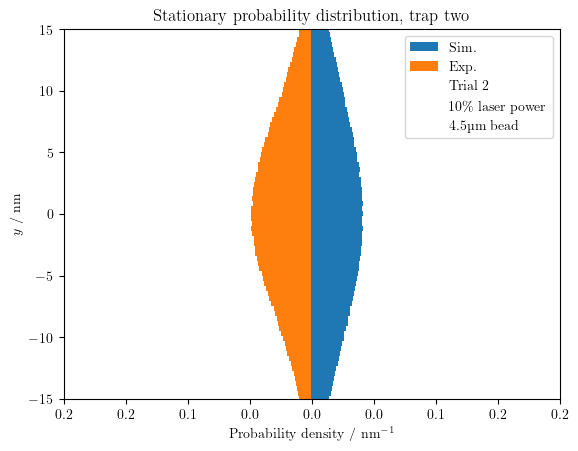

In [423]:
from matplotlib import pylab as pl

dataTwo = langevin_positions_V2y/1e-9;
dataOne = (pos_V2y - np.mean(pos_V2y))/1e-9;

hN = pl.hist(dataTwo,bins=np.linspace(-20.0,20.0,100) ,orientation='horizontal', density=True, rwidth=1, label='Sim.')
hS = pl.hist(dataOne, bins=hN[1], orientation='horizontal', density=True, 
    rwidth=1, label='Exp.')

for p in hS[2]:
    p.set_width( - p.get_width())

xmin = -0.2; xmax = 0.2;
rangee = xmax - xmin
delta = 0.0 * rangee
pl.xlim([xmin - delta, xmax + delta])
pl.ylim(-15,15)
xt = pl.xticks()
n = xt[0]
s = ['%.1f'%abs(i) for i in n]
pl.xticks(n, s)
pl.xlabel("Probability density / $\mathrm{nm}^{-1}$")
pl.ylabel("$y$ / nm")
pl.plot([], [], ' ', label="Trial "+trial_number)
pl.plot([], [], ' ', label=laser_power + "\% laser power")
pl.plot([], [], ' ', label=str(bead_diameter)+"µm bead")
pl.legend(loc="upper right")
pl.axvline(0.0)
plt.title("Stationary probability distribution, trap two")
if save_q:
    pl.savefig('figs/stat-dist___bead_diam='+str(fit_ps_V1x.params["Bead diameter"].value)+'-laser_power='+laser_power+'-trial='+trial_number+'-direction='+'y'+'-trap='+'2'+'.png',dpi=300)
pl.show()


We know (see Volpe):
$$
C_x(t)
=
\langle x(t'+t) x(t')\rangle_{t'}
=
\frac{k_B T}{\kappa} e^{-t/\tau},
$$
where $\tau = \gamma/\kappa$.
Because $V(t) = x(t)/\beta$, the autocorrelation function for $V(t)$ should follow:
$$
C_V(t)
=
\langle V(t'+t)V(t')\rangle_{t'}
=
\frac{C_x(t)}{\beta^2}
$$
Therefore, if we fit $\ln (C_v(t)/(1 \, \mathrm{V}^2))$ to the model $a + b t$, then,
$$
\kappa = -\gamma b,\qquad
\beta = \sqrt{\frac{k_B T}{-\gamma b \cdot (1\,\mathrm{V})^2} e^{-a}}
$$

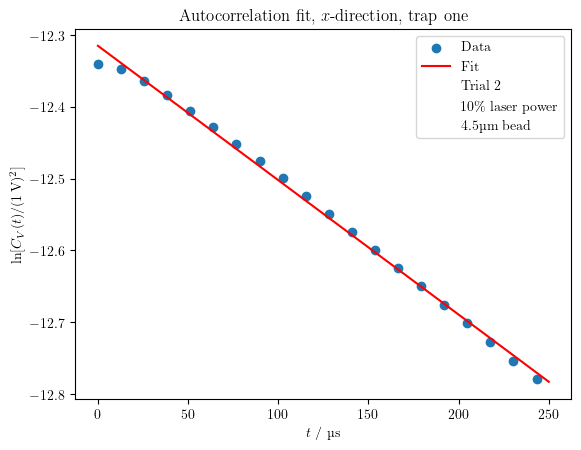

In [424]:
this_data = V1x;

gamma0 =  6*np.pi*fit_ps_V1x.params["Viscosity"].value*1e-6*fit_ps_V1x.params["Bead diameter"].value/2;

max_steps_here=100;
tsrange=range(0,20,1);
# tsrange=range(0,60,1);
Cv_dat = [
    np.log(
    np.mean(
    ((this_data - np.mean(this_data))[i:len(this_data)])
    *
    ((this_data - np.mean(this_data))[0:(len(this_data)-i)])
    )
    )
    for i in tsrange
]

Cv_fit = np.polyfit(t[tsrange],Cv_dat,1);

V1x_kappa_est = -gamma0*Cv_fit[0]*1e3;

V1x_beta_est = np.sqrt(np.exp(-Cv_fit[1])*kBT/(-gamma0*Cv_fit[0]))*1e6;

poly = np.poly1d(Cv_fit)
plt.scatter(1e6*t[tsrange],Cv_dat,label="Data")
# plt.plot(np.linspace(0,0.00075*1e6,100),poly(np.linspace(0,0.00075,100)),color="red",label="Fit");
plt.plot(np.linspace(0,0.00025*1e6,100),poly(np.linspace(0,0.00025,100)),color="red",label="Fit");
plt.legend()
plt.xlabel("$t$ / µs")
plt.ylabel("$\ln [C_V(t) / (1 \, \mathrm{V})^2]$")
plt.plot([], [], ' ', label="Trial "+trial_number)
plt.plot([], [], ' ', label=laser_power + "\% laser power")
plt.plot([], [], ' ', label=str(bead_diameter)+"µm bead")
plt.title("Autocorrelation fit, $x$-direction, trap one")
plt.legend(loc="upper right");
# plt.savefig("extragoodACF.png",dpi=300)
if save_q:
    plt.savefig('figs/autocorr___bead_diam='+str(fit_ps_V1x.params["Bead diameter"].value)+'-laser_power='+laser_power+'-trial='+trial_number+'-direction='+'x'+'-trap='+'1'+'.png',dpi=300)
plt.show()

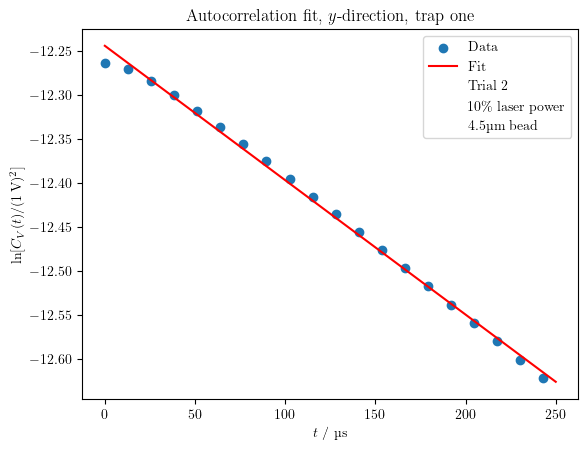

In [425]:
this_data = V1y;

gamma0 =  6*np.pi*fit_ps_V1x.params["Viscosity"].value*1e-6*fit_ps_V1x.params["Bead diameter"].value/2;

max_steps_here=100;
tsrange=range(0,20,1);
Cv_dat = [
    np.log(
    np.mean(
    ((this_data - np.mean(this_data))[i:len(this_data)])
    *
    ((this_data - np.mean(this_data))[0:(len(this_data)-i)])
    )
    )
    for i in tsrange
]

Cv_fit = np.polyfit(t[tsrange],Cv_dat,1);

V1y_kappa_est = -gamma0*Cv_fit[0]*1e3;

V1y_beta_est = np.sqrt(np.exp(-Cv_fit[1])*kBT/(-gamma0*Cv_fit[0]))*1e6;

poly = np.poly1d(Cv_fit)
plt.scatter(1e6*t[tsrange],Cv_dat,label="Data")
# plt.plot(np.linspace(0,0.001*1e6,100),poly(np.linspace(0,0.001,100)),color="red",label="Fit");
plt.plot(np.linspace(0,0.00025*1e6,100),poly(np.linspace(0,0.00025,100)),color="red",label="Fit");
plt.legend()
plt.xlabel("$t$ / µs")
plt.ylabel("$\ln [C_V(t) / (1 \, \mathrm{V})^2]$")
plt.plot([], [], ' ', label="Trial "+trial_number)
plt.plot([], [], ' ', label=laser_power + "\% laser power")
plt.plot([], [], ' ', label=str(bead_diameter)+"µm bead")
plt.title("Autocorrelation fit, $y$-direction, trap one")
if save_q:
    plt.savefig('figs/autocorr___bead_diam='+str(fit_ps_V1x.params["Bead diameter"].value)+'-laser_power='+laser_power+'-trial='+trial_number+'-direction='+'y'+'-trap='+'1'+'.png',dpi=300)
plt.legend(loc="upper right");

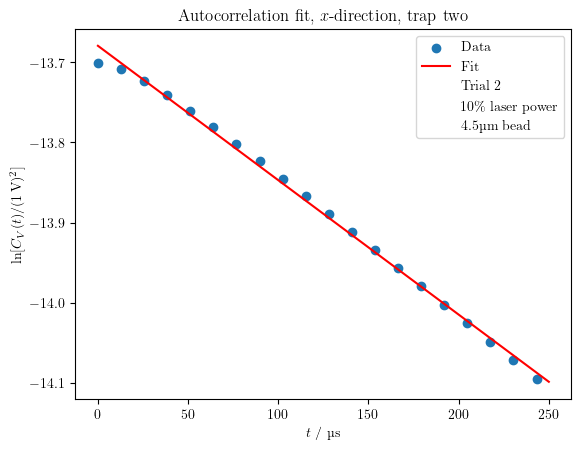

In [426]:
this_data = V2x;

gamma0 =  6*np.pi*fit_ps_V1x.params["Viscosity"].value*1e-6*fit_ps_V1x.params["Bead diameter"].value/2;

max_steps_here=100;
tsrange=range(0,20,1);
Cv_dat = [
    np.log(
    np.mean(
    ((this_data - np.mean(this_data))[i:len(this_data)])
    *
    ((this_data - np.mean(this_data))[0:(len(this_data)-i)])
    )
    )
    for i in tsrange
]

Cv_fit = np.polyfit(t[tsrange],Cv_dat,1);

V2x_kappa_est = -gamma0*Cv_fit[0]*1e3;

V2x_beta_est = np.sqrt(np.exp(-Cv_fit[1])*kBT/(-gamma0*Cv_fit[0]))*1e6;

poly = np.poly1d(Cv_fit)
plt.scatter(1e6*t[tsrange],Cv_dat,label="Data")
# plt.plot(np.linspace(0,0.001*1e6,100),poly(np.linspace(0,0.001,100)),color="red",label="Fit");
plt.plot(np.linspace(0,0.00025*1e6,100),poly(np.linspace(0,0.00025,100)),color="red",label="Fit");
plt.legend()
plt.xlabel("$t$ / µs")
plt.ylabel("$\ln [C_V(t) / (1 \, \mathrm{V})^2]$")
plt.plot([], [], ' ', label="Trial "+trial_number)
plt.plot([], [], ' ', label=laser_power + "\% laser power")
plt.plot([], [], ' ', label=str(bead_diameter)+"µm bead")
plt.title("Autocorrelation fit, $x$-direction, trap two")
if save_q:
    plt.savefig('figs/autocorr___bead_diam='+str(fit_ps_V1x.params["Bead diameter"].value)+'-laser_power='+laser_power+'-trial='+trial_number+'-direction='+'x'+'-trap='+'2'+'.png',dpi=300)
plt.legend(loc="upper right");

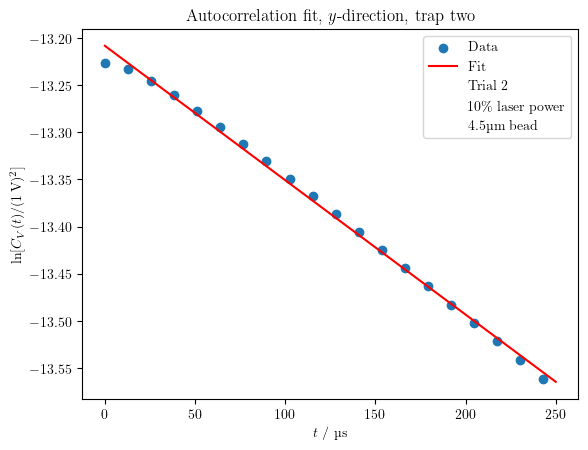

In [427]:
this_data = V2y;

gamma0 =  6*np.pi*fit_ps_V1x.params["Viscosity"].value*1e-6*fit_ps_V1x.params["Bead diameter"].value/2;

max_steps_here=100;
tsrange=range(0,20,1);
Cv_dat = [
    np.log(
    np.mean(
    ((this_data - np.mean(this_data))[i:len(this_data)])
    *
    ((this_data - np.mean(this_data))[0:(len(this_data)-i)])
    )
    )
    for i in tsrange
]

Cv_fit = np.polyfit(t[tsrange],Cv_dat,1);

V2y_kappa_est = -gamma0*Cv_fit[0]*1e3;

V2y_beta_est = np.sqrt(np.exp(-Cv_fit[1])*kBT/(-gamma0*Cv_fit[0]))*1e6;

poly = np.poly1d(Cv_fit)
plt.scatter(1e6*t[tsrange],Cv_dat,label="Data")
plt.plot(np.linspace(0,0.00025*1e6,100),poly(np.linspace(0,0.00025,100)),color="red",label="Fit");
plt.legend()
plt.xlabel("$t$ / µs")
plt.ylabel("$\ln [C_V(t) / (1 \, \mathrm{V})^2]$")
plt.plot([], [], ' ', label="Trial "+trial_number)
plt.plot([], [], ' ', label=laser_power + "\% laser power")
plt.plot([], [], ' ', label=str(bead_diameter)+"µm bead")
plt.title("Autocorrelation fit, $y$-direction, trap two")
if save_q:
    plt.savefig('figs/autocorr___bead_diam='+str(fit_ps_V1x.params["Bead diameter"].value)+'-laser_power='+laser_power+'-trial='+trial_number+'-direction='+'y'+'-trap='+'2'+'.png',dpi=300)
plt.legend(loc="upper right");

In [428]:
import json


In [429]:
this_direction = "x";
this_trap = "1";
this_fit_ps = fit_ps_V1x;
this_pos = pos_V1x;

gamma0 =  6*np.pi*this_fit_ps.params["Viscosity"].value*1e-6*this_fit_ps.params["Bead diameter"].value/2;
kBT = (this_fit_ps.params["Temperature"].value + 273.15) * 1.381e-23;
D_physical = kBT/gamma0;
stationary_std = np.std((this_pos - np.mean(this_pos)));
equipartition_std = np.sqrt(kBT/(this_fit_ps.results["kappa"].value*1e-3));

this_params = {
    "laser power" : laser_power,
    "trial number" : trial_number,
    "direction" : this_direction,
    "trap" : this_trap,
    "Bead diameter (um)" : this_fit_ps.params["Bead diameter"].value,
    "Viscosity (Pa*s)" : this_fit_ps.params["Viscosity"].value,
    "Temperature" : this_fit_ps.params["Temperature"].value,
    "Rf (pN/V)" : this_fit_ps.results["Rf"].value,
    "fc (Hz)" : this_fit_ps.results["fc"].value,
    "err_fc (Hz)" : this_fit_ps.results["err_fc"].value,
    "D (V^2/s)" : this_fit_ps.results["D"].value,
    "err_D (V^2/s)" : this_fit_ps.results["err_D"].value,
    "beta (um/V)" : this_fit_ps.results["Rd"].value,
    "beta err (um/V)" : 1e6*this_fit_ps.results["err_D"].value*np.sqrt(D_physical/(this_fit_ps.results["D"].value**3))/2,
    "kappa (pN/nm)" : this_fit_ps.results["kappa"].value,
    "kappa err (pN/nm)": 2*np.pi*gamma0*this_fit_ps.results["err_fc"].value*1e3,
    "stationary std (m)" : stationary_std,
    "equipartition std (m)" : equipartition_std,
    "std rel err" : abs(stationary_std - equipartition_std)/equipartition_std,
    "autocorr kappa (pN/nm)" : V1x_kappa_est,
    "autocorr beta (um/V)" : V1x_beta_est
}

if save_q:
    json.dump(this_params,open('processed_params/bead_diam='+str(this_fit_ps.params["Bead diameter"].value)+'-laser_power='+laser_power+'-trial='+trial_number+'-direction='+this_direction+'-trap='+this_trap+'.txt','w'),indent=4)


In [430]:
this_direction = "y";
this_trap = "1";
this_fit_ps = fit_ps_V1y;
this_pos = pos_V1y;

gamma0 =  6*np.pi*this_fit_ps.params["Viscosity"].value*1e-6*this_fit_ps.params["Bead diameter"].value/2;
kBT = (this_fit_ps.params["Temperature"].value + 273.15) * 1.381e-23;
D_physical = kBT/gamma0;
stationary_std = np.std((this_pos - np.mean(this_pos)));
equipartition_std = np.sqrt(kBT/(this_fit_ps.results["kappa"].value*1e-3));

this_params = {
    "laser power" : laser_power,
    "trial number" : trial_number,
    "direction" : this_direction,
    "trap" : this_trap,
    "Bead diameter (um)" : this_fit_ps.params["Bead diameter"].value,
    "Viscosity (Pa*s)" : this_fit_ps.params["Viscosity"].value,
    "Temperature" : this_fit_ps.params["Temperature"].value,
    "Rf (pN/V)" : this_fit_ps.results["Rf"].value,
    "fc (Hz)" : this_fit_ps.results["fc"].value,
    "err_fc (Hz)" : this_fit_ps.results["err_fc"].value,
    "D (V^2/s)" : this_fit_ps.results["D"].value,
    "err_D (V^2/s)" : this_fit_ps.results["err_D"].value,
    "beta (um/V)" : this_fit_ps.results["Rd"].value,
    "beta err (um/V)" : 1e6*this_fit_ps.results["err_D"].value*np.sqrt(D_physical/(this_fit_ps.results["D"].value**3))/2,
    "kappa (pN/nm)" : this_fit_ps.results["kappa"].value,
    "kappa err (pN/nm)": 2*np.pi*gamma0*this_fit_ps.results["err_fc"].value*1e3,
    "stationary std (m)" : stationary_std,
    "equipartition std (m)" : equipartition_std,
    "std rel err" : abs(stationary_std - equipartition_std)/equipartition_std,
    "autocorr kappa (pN/nm)" : V1y_kappa_est,
    "autocorr beta (um/V)" : V1y_beta_est
}

if save_q:
    json.dump(this_params,open('processed_params/bead_diam='+str(this_fit_ps.params["Bead diameter"].value)+'-laser_power='+laser_power+'-trial='+trial_number+'-direction='+this_direction+'-trap='+this_trap+'.txt','w'),indent=4)


In [431]:
this_direction = "x";
this_trap = "2";
this_fit_ps = fit_ps_V2x;
this_pos = pos_V2x;

gamma0 =  6*np.pi*this_fit_ps.params["Viscosity"].value*1e-6*this_fit_ps.params["Bead diameter"].value/2;
kBT = (this_fit_ps.params["Temperature"].value + 273.15) * 1.381e-23;
D_physical = kBT/gamma0;
stationary_std = np.std((this_pos - np.mean(this_pos)));
equipartition_std = np.sqrt(kBT/(this_fit_ps.results["kappa"].value*1e-3));

this_params = {
    "laser power" : laser_power,
    "trial number" : trial_number,
    "direction" : this_direction,
    "trap" : this_trap,
    "Bead diameter (um)" : this_fit_ps.params["Bead diameter"].value,
    "Viscosity (Pa*s)" : this_fit_ps.params["Viscosity"].value,
    "Temperature" : this_fit_ps.params["Temperature"].value,
    "Rf (pN/V)" : this_fit_ps.results["Rf"].value,
    "fc (Hz)" : this_fit_ps.results["fc"].value,
    "err_fc (Hz)" : this_fit_ps.results["err_fc"].value,
    "D (V^2/s)" : this_fit_ps.results["D"].value,
    "err_D (V^2/s)" : this_fit_ps.results["err_D"].value,
    "beta (um/V)" : this_fit_ps.results["Rd"].value,
    "beta err (um/V)" : 1e6*this_fit_ps.results["err_D"].value*np.sqrt(D_physical/(this_fit_ps.results["D"].value**3))/2,
    "kappa (pN/nm)" : this_fit_ps.results["kappa"].value,
    "kappa err (pN/nm)": 2*np.pi*gamma0*this_fit_ps.results["err_fc"].value*1e3,
    "stationary std (m)" : stationary_std,
    "equipartition std (m)" : equipartition_std,
    "std rel err" : abs(stationary_std - equipartition_std)/equipartition_std,
    "autocorr kappa (pN/nm)" : V2x_kappa_est,
    "autocorr beta (um/V)" : V2x_beta_est
}

if save_q:
    json.dump(this_params,open('processed_params/bead_diam='+str(this_fit_ps.params["Bead diameter"].value)+'-laser_power='+laser_power+'-trial='+trial_number+'-direction='+this_direction+'-trap='+this_trap+'.txt','w'),indent=4)


In [432]:
this_direction = "y";
this_trap = "2";
this_fit_ps = fit_ps_V2y;
this_pos = pos_V2y;

gamma0 =  6*np.pi*this_fit_ps.params["Viscosity"].value*1e-6*this_fit_ps.params["Bead diameter"].value/2;
kBT = (this_fit_ps.params["Temperature"].value + 273.15) * 1.381e-23;
D_physical = kBT/gamma0;
stationary_std = np.std((this_pos - np.mean(this_pos)));
equipartition_std = np.sqrt(kBT/(this_fit_ps.results["kappa"].value*1e-3));

this_params = {
    "laser power" : laser_power,
    "trial number" : trial_number,
    "direction" : this_direction,
    "trap" : this_trap,
    "Bead diameter (um)" : this_fit_ps.params["Bead diameter"].value,
    "Viscosity (Pa*s)" : this_fit_ps.params["Viscosity"].value,
    "Temperature" : this_fit_ps.params["Temperature"].value,
    "Rf (pN/V)" : this_fit_ps.results["Rf"].value,
    "fc (Hz)" : this_fit_ps.results["fc"].value,
    "err_fc (Hz)" : this_fit_ps.results["err_fc"].value,
    "D (V^2/s)" : this_fit_ps.results["D"].value,
    "err_D (V^2/s)" : this_fit_ps.results["err_D"].value,
    "beta (um/V)" : this_fit_ps.results["Rd"].value,
    "beta err (um/V)" : 1e6*this_fit_ps.results["err_D"].value*np.sqrt(D_physical/(this_fit_ps.results["D"].value**3))/2,
    "kappa (pN/nm)" : this_fit_ps.results["kappa"].value,
    "kappa err (pN/nm)": 2*np.pi*gamma0*this_fit_ps.results["err_fc"].value*1e3,
    "stationary std (m)" : stationary_std,
    "equipartition std (m)" : equipartition_std,
    "std rel err" : abs(stationary_std - equipartition_std)/equipartition_std,
    "autocorr kappa (pN/nm)" : V2y_kappa_est,
    "autocorr beta (um/V)" : V2y_beta_est
}

if save_q:
    json.dump(this_params,open('processed_params/bead_diam='+str(this_fit_ps.params["Bead diameter"].value)+'-laser_power='+laser_power+'-trial='+trial_number+'-direction='+this_direction+'-trap='+this_trap+'.txt','w'),indent=4)
